<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-В2" data-toc-modified-id="Общий-вывод-по-проекту-В2-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><b>Общий вывод по проекту В2</b></a></span></li></ul></div>

# Отток клиентов

# Импортируем библиотеки

In [353]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.dummy import DummyClassifier

## Подготовка данных

Загрузим данные в переменную data

In [354]:
data = pd.read_csv('/datasets/Churn.csv')

Посмотрим количество строк и столбцов

In [355]:
data.shape

(10000, 14)

Проверим названия столбцов и краткую сводку по данным

In [356]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Проверим типы данных в столбцах

In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Посмотрим общую статистику по столбцам

In [358]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


**Признаки:**
- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата


**Целевой признак:**
- `Exited` — факт ухода клиента

Посмотрим гистаграммы распределения частот по столбцам

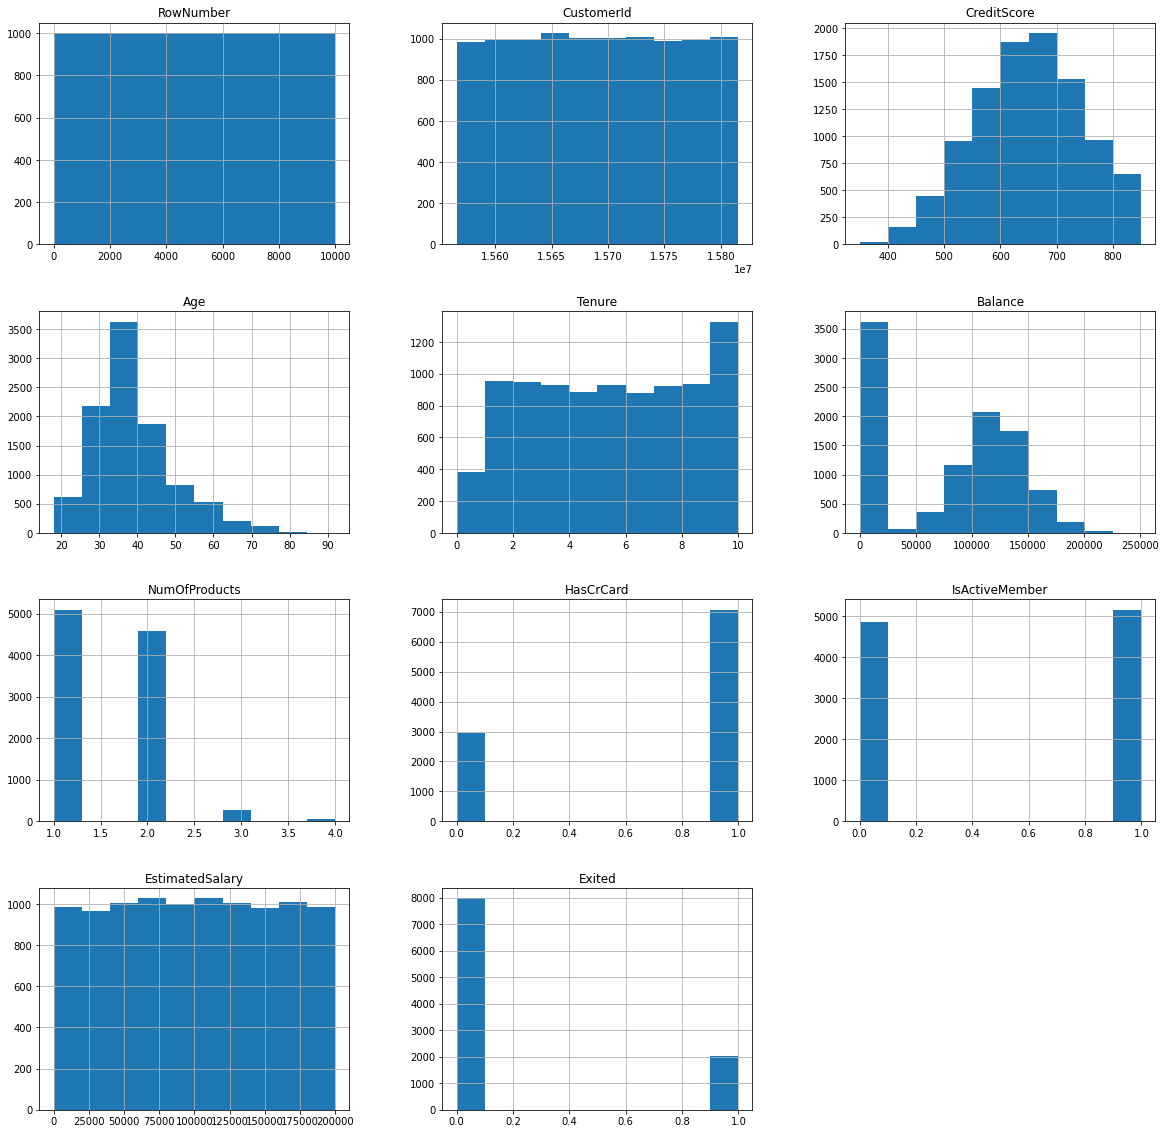

In [359]:
data.hist(figsize=(20,20))
plt.show()

In [360]:
data.duplicated().sum()

0

Проверим значения в столбце CreditScore

In [361]:
data['CreditScore'].value_counts()

850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: CreditScore, Length: 460, dtype: int64

Проверим значения в столбце Geography 

In [362]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Проверим значения в столбце Gender

In [363]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Проверим значения в столбце NumOfProducts

In [364]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

Проверим значения в столбце HasCrCard

In [365]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

Проверим значения в столбце IsActiveMember

In [366]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

Изучение значений в столбце Tenure

In [367]:
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

Заполним пропуски в столбце Tenure и преобразуем его в целочисленный тип

In [368]:
data = data.dropna()

In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


Преобразуем категориальные признаки в численные с помощью техники OHE ,удалив столбцы, в которых для нашего исследования нет необходимости: RowNumber, CustomerId, Surname

In [370]:
data_ohe = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data_ohe = pd.get_dummies(data_ohe, drop_first=True)
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9091 non-null   int64  
 1   Age                9091 non-null   int64  
 2   Tenure             9091 non-null   float64
 3   Balance            9091 non-null   float64
 4   NumOfProducts      9091 non-null   int64  
 5   HasCrCard          9091 non-null   int64  
 6   IsActiveMember     9091 non-null   int64  
 7   EstimatedSalary    9091 non-null   float64
 8   Exited             9091 non-null   int64  
 9   Geography_Germany  9091 non-null   uint8  
 10  Geography_Spain    9091 non-null   uint8  
 11  Gender_Male        9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 736.9 KB


Вывод:
- Данные имеют 10000 строк и 14 столбцов
- После удаления ненужных столбцов и избежания дамми ловушки осталось 12 стобцов
- Были заменены пропуски в столбце Tenure

## Исследование задачи

После удаления столбцов, не несущих пользы для исследования и избежания дамми ловушки имеем

In [371]:
data_ohe.shape

(9091, 12)

Разделим датасет на 3 выборки : тренировочную, валидационную и тестовую в соотношении 60 : 20 : 20.

In [372]:
data_80, data_test = train_test_split(data_ohe, test_size=.2, random_state=12345)
data_train, data_valid = train_test_split(data_80, test_size=.25, random_state=12345)
display(data_train.shape)
display(data_test.shape)
display(data_valid.shape)

(5454, 12)

(1819, 12)

(1818, 12)

Создадим для каждой из выборок features и target переменные со соответствующими столбцами

In [373]:
features_train = data_train.drop(['Exited'], axis=1)
target_train = data_train['Exited']
features_valid = data_valid.drop(['Exited'], axis=1)
target_valid = data_valid['Exited']
features_test = data_test.drop(['Exited'], axis=1)
target_test = data_test['Exited']
features_train_for_test = data_train.drop(['Exited'], axis=1)
target_train_for_test = data_train['Exited']

In [374]:
features_train.shape

(5454, 11)

In [375]:
scaler = StandardScaler()
scaler.fit(features_train)

pd.options.mode.chained_assignment = None
features_train = scaler.transform(features_train)
features_valid = pd.DataFrame(scaler.transform(features_valid))
features_test = pd.DataFrame(scaler.transform(features_test))

Посмотрим как разспределился целевой признак в общей выборке

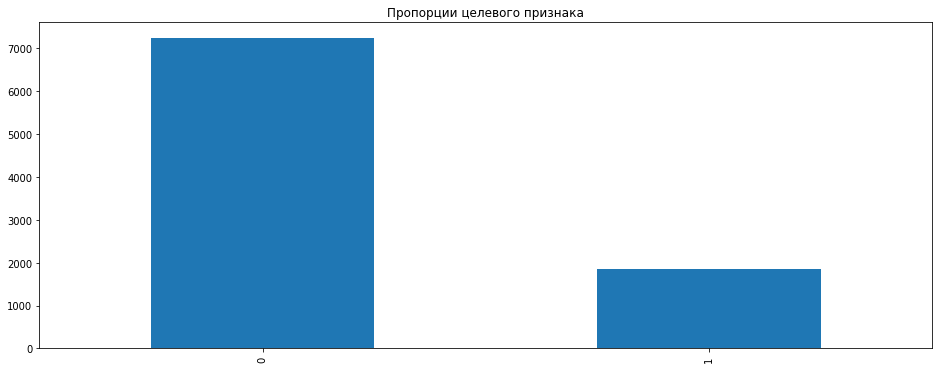

In [376]:
data['Exited'].value_counts().plot(kind='bar',figsize=(16,6),title='Пропорции целевого признака')
plt.show()

Видим дисбаланс в данных, один класс в 4 раза больше другого

Изучим модели без учета дисбалланса

**Логистическая регрессия**

In [377]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_train, target_train)
predictions_valid = model_lr.predict(features_valid)
f1_score(target_valid, predictions_valid)


probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("F1:",f1_score(target_valid, predictions_valid) )
print("AUC-ROC:",auc_roc)

F1: 0.3004115226337448
AUC-ROC: 0.772461951858375


**Дерево решений**

Лучший результат 0.557427258805513
Лучшая глубина 9
AUC-ROC: 0.8062753089765011


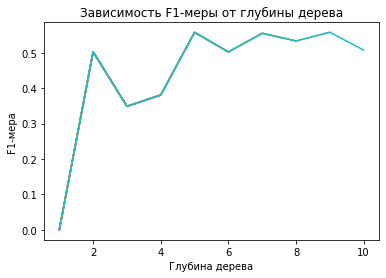

In [378]:
best_result = 0
depth = 0
depths = []
results = []

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    depths.append(depth)
    results.append(result)
        
    plt.plot(depths, results)
    plt.title("Зависимость F1-меры от глубины дерева")
    plt.xlabel("Глубина дерева")
    plt.ylabel("F1-мера")
    plt.grid()
    plt.show
            
    if result > best_result:
        best_depth = depth
        best_result = result


        
model = DecisionTreeClassifier(random_state=12345, max_depth=best_depth)
model.fit(features_train, target_train)
    
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('Лучший результат',best_result)
print('Лучшая глубина',best_depth)
print('AUC-ROC:', auc_roc)

**Cлучайный лес**

In [379]:
best_result = 0
for depth in range(1, 30, 1):
    model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_result = result
        best_depth = depth


print('Лучшая глубина',best_depth)
print('Лучший результат',best_result)

Лучшая глубина 14
Лучший результат 0.5570934256055363


Лучший результат 0.5570934256055363
Лучшее количество деревьев 20
AUC_ROC: 0.8218916060756597


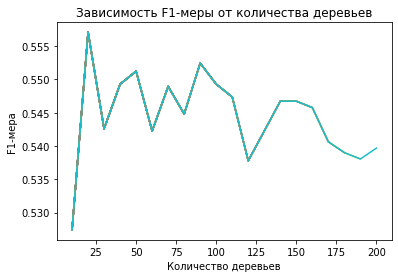

In [380]:
best_model = None
best_result = 0
n_estimators = []
results_rf = []
for est in range(10, 201, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=14)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    n_estimators.append(est)
    results_rf.append(result)
        
    plt.plot(n_estimators, results_rf)
    plt.title("Зависимость F1-меры от количества деревьев")
    plt.xlabel("Количество деревьев")
    plt.ylabel("F1-мера")
    plt.grid()
    plt.show
    
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est

        
model = RandomForestClassifier(random_state=12345, n_estimators=best_est, max_depth=14)
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('Лучший результат',best_result)
print('Лучшее количество деревьев',best_est)
print('AUC_ROC:', auc_roc)

Вывод:
- Были созданны 3 выборки: тренировочная, тестовая и валидационнная в соотношении 60 : 20 : 20
- Целевые признаки и признаки для обучения были разделены
- Балланс целевого класса 1 : 4
- Ни одна из моделей не дотягивает до нужного уровня метрики

## Борьба с дисбалансом

![Текст с описанием картинки](https://krot.info/uploads/posts/2022-03/1646689110_50-krot-info-p-volnaya-borba-smeshnie-smeshnie-foto-52.jpg)

Стандартизируем выборку при помощи структуры стандартизации данных StandardScaler

Создадим и обучим:
- Логистическую регрессию
- Дерево решений 
- Случайный лес

В качестве баллансировки применим метод class_weight.

**Логистическая регрессия**

In [382]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_lr.fit(features_train, target_train)
predictions_valid = model_lr.predict(features_valid)
f1_score(target_valid, predictions_valid)

0.49458128078817737

**Дерево решений**

Лучший результат 0.5555555555555556
Лучшая глубина 7
AUC-ROC 0.8150158439838022


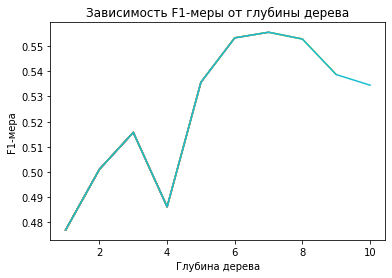

In [383]:
best_result = 0
depth = 0
depths = []
results = []

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    depths.append(depth)
    results.append(result)
        
    plt.plot(depths, results)
    plt.title("Зависимость F1-меры от глубины дерева")
    plt.xlabel("Глубина дерева")
    plt.ylabel("F1-мера")
    plt.grid()
    plt.show
    
    probabilities_valid = model.predict_proba(features_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
            
    if result > best_result:
        best_depth = depth
        best_result = result
        best_auc_roc = auc_roc


print('Лучший результат',best_result)
print('Лучшая глубина',best_depth)
print('AUC-ROC', best_auc_roc)

**Cлучайный лес**

Сначала подберем глубину, при небольшом количестве деревьев, потом в цикле увеличим количество деревьев, обязательно добавим class_weight='balanced'

In [384]:
best_result = 0
for depth in range(1, 30, 1):
    model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=12345,class_weight='balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_result = result
        best_depth = depth


print('Лучшая глубина',best_depth)
print('Лучший результат',best_result)

Лучшая глубина 10
Лучший результат 0.5885714285714284


Лучший результат 0.61212976022567
Лучшее количество деревьев 90


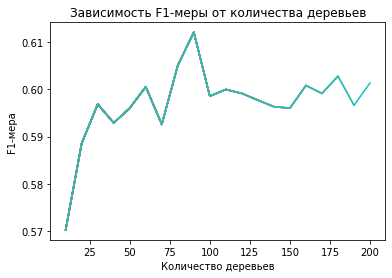

In [385]:
best_model = None
best_result = 0
n_estimators = []
results_rf = []
for est in range(10, 201, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=10, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    n_estimators.append(est)
    results_rf.append(result)
        
    plt.plot(n_estimators, results_rf)
    plt.title("Зависимость F1-меры от количества деревьев")
    plt.xlabel("Количество деревьев")
    plt.ylabel("F1-мера")
    plt.grid()
    plt.show
    
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est


print('Лучший результат',best_result)
print('Лучшее количество деревьев',best_est)

In [386]:
best_model = None
best_f1 = 0
best_auc_roc = 0

for est in range(10, 201, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=10, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions_valid)
    probabilities_valid = model.predict_proba(features_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
    if f1 > best_f1:
        best_model = model
        best_f1 = f1
        best_est = est
        best_auc_roc = auc_roc

display('Количество деревьев:', best_est)
display('AUC-ROC', best_auc_roc)
display('F1-мера', best_f1)

'Количество деревьев:'

90

'AUC-ROC'

0.8459407788766954

'F1-мера'

0.61212976022567

Построим график AUC-ROC

In [387]:
model_tree=DecisionTreeClassifier(class_weight='balanced',max_depth=6,random_state=1234).fit(features_train,target_train)
model_forest=RandomForestClassifier(class_weight='balanced',max_depth=10,n_estimators=90,random_state=1234).fit(features_train,target_train)
model_logistic=LogisticRegression(class_weight='balanced',solver='liblinear').fit(features_train,target_train)

In [388]:
probabilities_tree=model_tree.predict_proba(features_valid)
probabilities_one_valid_tree=probabilities_tree[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(target_valid,probabilities_one_valid_tree)

auc_roc_tree=roc_auc_score(target_valid,probabilities_one_valid_tree)

probabilities_forest=model_forest.predict_proba(features_valid)
probabilities_one_valid_forest=probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(target_valid,probabilities_one_valid_forest)

auc_roc_forest=roc_auc_score(target_valid,probabilities_one_valid_forest)

probabilities_reg=model_logistic.predict_proba(features_valid)
probabilities_one_valid_reg=probabilities_reg[:,1]
fpr_log,tpr_log,thresholds=roc_curve(target_valid,probabilities_one_valid_reg)

auc_roc_reg=roc_auc_score(target_valid,probabilities_one_valid_reg)

<Figure size 432x288 with 0 Axes>

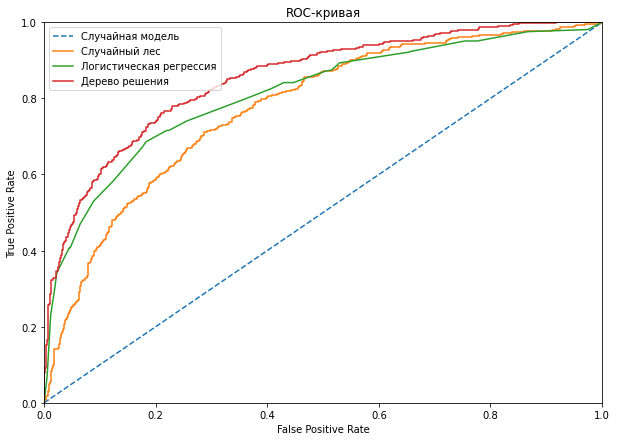

In [389]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left') 
plt.show()

Теперь потестируем метод upsampling.

In [390]:
data_80, data_test = train_test_split(data_ohe, test_size=.2, random_state=12345)
data_train, data_valid = train_test_split(data_80, test_size=.25, random_state=12345)
display(data_train.shape)
display(data_test.shape)
display(data_valid.shape)

(5454, 12)

(1819, 12)

(1818, 12)

In [391]:
features_train = data_train.drop(['Exited'], axis=1)
target_train = data_train['Exited']
features_valid = data_valid.drop(['Exited'], axis=1)
target_valid = data_valid['Exited']
features_test = data_test.drop(['Exited'], axis=1)
target_test = data_test['Exited']
features_train_for_test = data_train.drop(['Exited'], axis=1)
target_train_for_test = data_train['Exited']

In [392]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_balance_up,target_balance_up=upsampling(features_train,target_train,4)

Протестируем модели на увеличенных выборках

Логистическая регрессия

In [393]:
model_logistic=LogisticRegression(class_weight='balanced',solver='liblinear').fit(features_balance_up,target_balance_up)
prediction=model_logistic.predict(features_valid)
print('F1:',f1_score(target_valid,prediction))

F1: 0.45272727272727276


Дерево решений

In [394]:
for depth in range(1,20,1):
    model_tree=DecisionTreeClassifier(class_weight='balanced',max_depth=depth,random_state=1234).fit(features_balance_up,target_balance_up)
  
    prediction=model_tree.predict(features_valid)
    print('max_depth:',depth,'F1:',f1_score(target_valid,prediction))

max_depth: 1 F1: 0.47692307692307695
max_depth: 2 F1: 0.5010706638115632
max_depth: 3 F1: 0.5156950672645739
max_depth: 4 F1: 0.4861227922624054
max_depth: 5 F1: 0.535675082327113
max_depth: 6 F1: 0.5533262935586061
max_depth: 7 F1: 0.5463709677419356
max_depth: 8 F1: 0.549234135667396
max_depth: 9 F1: 0.5426008968609866
max_depth: 10 F1: 0.5359477124183005
max_depth: 11 F1: 0.5225027442371021
max_depth: 12 F1: 0.5000000000000001
max_depth: 13 F1: 0.492822966507177
max_depth: 14 F1: 0.5006165228113441
max_depth: 15 F1: 0.49104859335038364
max_depth: 16 F1: 0.47927461139896377
max_depth: 17 F1: 0.49473684210526314
max_depth: 18 F1: 0.4899057873485868
max_depth: 19 F1: 0.4791386271870794


Случайный лес

In [395]:
for max_depth in range(1,20,1):
    model_forest=RandomForestClassifier(class_weight='balanced',max_depth=max_depth,n_estimators=50,random_state=1234).fit(features_balance_up,target_balance_up)
    prediction=model_forest.predict(features_valid)
    print('max_depth:',max_depth,'F1:',f1_score(target_valid,prediction))
    

max_depth: 1 F1: 0.505795574288725
max_depth: 2 F1: 0.5477560414269275
max_depth: 3 F1: 0.5605536332179931
max_depth: 4 F1: 0.5714285714285714
max_depth: 5 F1: 0.5767441860465116
max_depth: 6 F1: 0.5855855855855855
max_depth: 7 F1: 0.5925925925925924
max_depth: 8 F1: 0.5821596244131455
max_depth: 9 F1: 0.5796407185628742
max_depth: 10 F1: 0.5913705583756346
max_depth: 11 F1: 0.58777633289987
max_depth: 12 F1: 0.5883905013192612
max_depth: 13 F1: 0.5803698435277382
max_depth: 14 F1: 0.5788712011577424
max_depth: 15 F1: 0.568452380952381
max_depth: 16 F1: 0.5931445603576753
max_depth: 17 F1: 0.5835866261398176
max_depth: 18 F1: 0.5801526717557252
max_depth: 19 F1: 0.5740740740740742


In [396]:
for estim in range(1,101,1):
    model_forest=RandomForestClassifier(class_weight='balanced',max_depth=16,n_estimators=estim,random_state=1234).fit(features_balance_up,target_balance_up)
    prediction=model_forest.predict(features_valid)
    print('estim',estim,'F1:',f1_score(target_valid,prediction))
    

estim 1 F1: 0.46191646191646196
estim 2 F1: 0.4342313787638669
estim 3 F1: 0.49866666666666665
estim 4 F1: 0.513677811550152
estim 5 F1: 0.5361111111111111
estim 6 F1: 0.5327380952380951
estim 7 F1: 0.5497896213183731
estim 8 F1: 0.549777117384844
estim 9 F1: 0.5602322206095791
estim 10 F1: 0.557037037037037
estim 11 F1: 0.5573294629898404
estim 12 F1: 0.5710059171597633
estim 13 F1: 0.5586107091172213
estim 14 F1: 0.5634218289085546
estim 15 F1: 0.563953488372093
estim 16 F1: 0.564327485380117
estim 17 F1: 0.5647058823529412
estim 18 F1: 0.5651537335285506
estim 19 F1: 0.5602322206095791
estim 20 F1: 0.5638766519823789
estim 21 F1: 0.5685131195335277
estim 22 F1: 0.5865102639296189
estim 23 F1: 0.5840707964601771
estim 24 F1: 0.5878877400295421
estim 25 F1: 0.5873715124816445
estim 26 F1: 0.5861561119293079
estim 27 F1: 0.5891016200294551
estim 28 F1: 0.588757396449704
estim 29 F1: 0.5905044510385757
estim 30 F1: 0.5967503692762186
estim 31 F1: 0.5896296296296296
estim 32 F1: 0.591381

Вывод:
- Балланс целевого класса 1 : 4
- Был применен метод стандартизации данных к обучающим выборкам
- Для баллансировки были применены методы class_weight = 'balanced' и upsample
- Лучше всего себя показал случайный лес с параметрами глубина - 10 и количество деревьев 90
    - На валидационной выборке он показал:
            - AUC-ROC = 0.8459407788766954
            - F1-мера = 0.61212976022567
- Все меры стали лучше после баллансировки классов
- Лучшие результаты показали балансировка после метода class_weight

## Тестирование модели

Протестируем модель на тестовой выборке

Без применения class_weight

In [400]:
model = RandomForestClassifier(random_state=12345, n_estimators=90, max_depth=10)
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

probabilities_test = model.predict_proba(features_test)

display('AUC-ROC', roc_auc_score(target_test, probabilities_test[:, 1]))
display('F1-мера', f1_score(target_test, predictions_test))

'AUC-ROC'

0.8649827118960844

'F1-мера'

0.5480427046263344

Сбалансированная с помощью class_weight

In [401]:
model = RandomForestClassifier(random_state=12345, n_estimators=90, max_depth=10, class_weight='balanced')
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

probabilities_test = model.predict_proba(features_test)

display('AUC-ROC', roc_auc_score(target_test, probabilities_test[:, 1]))
display('F1-мера', f1_score(target_test, predictions_test))

'AUC-ROC'

0.8569049621530698

'F1-мера'

0.6013793103448275

Вывод:
- Были проверены 3 модели: логистическая регрессия, дерево решений и случайный лес
- Лучше всего себя показал случайный лес с глубиной 8 и количпеством деревьев 160
- На тестовой выборке случайный лес показал:
    - AUC-ROC равный 0.8569049621530698
    - F1-мера равная 0.6013793103448275
    
- Данные показатели удовлетворяют условиям задачи

Общий вывод:

- Данные имеют 10000 строк и 14 столбцов
- После удаления ненужных столбцов и избежания дамми ловушки осталось 12 стобцов
- Были заменены пропуски в столбце Tenure
- Были созданны 3 выборки: тренировочная, тестовая и валидационнная в соотношении 60 : 20 : 20
- Целевые признаки и признаки для обучения были разделены
- Балланс целевого класса 1 : 4
- Был применен метод стандартизации данных к обучающим выборкам
- Были проверены 3 модели: логистическая регрессия, дерево решений и случайный лес

- Лучше всего себя показал случайный лес с глубиной 8 и количпеством деревьев 160

- На тестовой выборке случайный лес показал:

    - AUC-ROC равный 0.8689477437614546
    - F1-мера равная 0.6492942453854507
- Данные показатели удовлетворяют условиям задачи